# Latam Datascience Challenge 202202

In [1]:
# Setting up configs
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# First batch of imports for EDA/VDA
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use("seaborn")
import seaborn as sns
sns.set_style("darkgrid")

%load_ext watermark
%watermark

Last updated: 2022-03-12T04:31:44.705280-03:00

Python implementation: CPython
Python version       : 3.7.11
IPython version      : 7.12.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit



In [3]:
# Setting pandas displaying options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Exploratory Data Analysis

**tl;dr: sección de revisión de dataset y creación de variables sintéticas solicitadas. El dataset principalmente contiene variables de tipo etiquetas.**

En esta sección se cubren los requerimientos referidos a creación de variables sintéticas depdendientes de las provistas en el dataset original.

Además, se cubren las evaluaciones básicas de datos faltantes (y gestión de los mismos), y asignación de tipos de datos cuando corresponda.

Dado que no solamente se cuenta con variables de tipo etiquetas tales como ciudades (ida - destino, aerolíneas, Vlo-I, Vlo-O, etc.) sino que además se generan otras variables de tipo etiquetas (incluso el atraso termina siendo tratado en forma binaria), se presume que en la sección de ML se deberán evaluar modelos de clasificación.

In [4]:
#Importing data and checking basics
data_SCL = pd.read_csv("data/dataset_SCL.csv")

print(f"{data_SCL.head()}\n")
print(f"{data_SCL.tail()}\n")
print(f"{data_SCL.info()}\n")

               Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  SIGLAORI SIGLADES
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines  Santiago    Miami
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines  Santiago    Miami
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines  Santiago    Miami
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines  Santiago    Miami
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines  Santiago    Miam

C:\Users\pablo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Checking row of missing value
print(data_SCL[data_SCL["Vlo-O"].isnull()])

# Filling missing value
"""Se determina completar el campo faltante con el valor de Vlo-I porque
los valores entre Vlo-O y Vlo-I se corresponden, según lo visto en los métodos
head() y tail()"""
data_SCL['Vlo-O'].fillna(data_SCL["Vlo-I"], inplace=True)

print(f"\n{data_SCL.iloc[6068]}\n")

                  Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O Ori-O Des-O Emp-O  DIA  MES   AÑO  DIANOM TIPOVUELO                 OPERA  SIGLAORI SIGLADES
6068  2017-01-19 11:00:00   200  SCEL  SPJC   LAW  2017-01-19 11:03:00   NaN  SCEL  SPJC   56R   19    1  2017  Jueves         I  Latin American Wings  Santiago     Lima

Fecha-I       2017-01-19 11:00:00
Vlo-I                         200
Ori-I                        SCEL
Des-I                        SPJC
Emp-I                         LAW
Fecha-O       2017-01-19 11:03:00
Vlo-O                         200
Ori-O                        SCEL
Des-O                        SPJC
Emp-O                         56R
DIA                            19
MES                             1
AÑO                          2017
DIANOM                     Jueves
TIPOVUELO                       I
OPERA        Latin American Wings
SIGLAORI                 Santiago
SIGLADES                     Lima
Name: 6068, dtype: object



In [6]:
# Parsing dates
data_SCL["Fecha-I"] = pd.to_datetime(data_SCL["Fecha-I"],
                                     format = "%Y-%m-%d %H:%M:%S")
data_SCL["Fecha-O"] = pd.to_datetime(data_SCL["Fecha-O"],
                                     format = "%Y-%m-%d %H:%M:%S")

In [7]:
# Setting temporada_alta
"""Lo hice por fuerza bruta, en tanto encuentre una forma pitónica de modificar las fechas
acorde al esquema provisto"""

data_SCL["temporada_alta"] = 0

data_SCL.loc[((data_SCL["Fecha-I"].dt.month == 12) & \
              (data_SCL["Fecha-I"].dt.day >= 15) \
            | (data_SCL["Fecha-I"].dt.month <= 2) 
            | (data_SCL["Fecha-I"].dt.month == 3) & \
            (data_SCL["Fecha-I"].dt.day <= 3)), "temporada_alta"] = 1

data_SCL.loc[((data_SCL["Fecha-I"].dt.month == 7) & \
              (data_SCL["Fecha-I"].dt.day >= 15)), "temporada_alta"] = 1

data_SCL.loc[((data_SCL["Fecha-I"].dt.month == 9) & \
              (data_SCL["Fecha-I"].dt.day >= 11)), "temporada_alta"] = 1

data_SCL["temporada_alta"] = data_SCL["temporada_alta"].astype("bool")

In [8]:
# Creating dif_min column
data_SCL["dif_min"] = (data_SCL["Fecha-O"] - \
                       data_SCL["Fecha-I"]).astype("timedelta64[m]")

data_SCL["dif_min"] = data_SCL["dif_min"].astype("int")

In [9]:
# Creating atraso_15 column
data_SCL["atraso_15"] = 0
data_SCL.loc[(data_SCL["dif_min"] > 15), "atraso_15"] = 1
data_SCL["atraso_15"] = data_SCL["atraso_15"].astype("bool")

In [10]:
# Creating periodo_dia column
data_SCL.loc[((data_SCL["Fecha-I"].dt.hour >= 5) &
              (data_SCL["Fecha-I"].dt.hour < 12)), "periodo_dia"] = "mañana"
data_SCL.loc[((data_SCL["Fecha-I"].dt.hour >= 12) &
              (data_SCL["Fecha-I"].dt.hour < 19)), "periodo_dia"] = "tarde"
data_SCL.loc[((data_SCL["Fecha-I"].dt.hour >= 19) |
              (data_SCL["Fecha-I"].dt.hour < 5)), "periodo_dia"] = "noche"

data_SCL["periodo_dia"] = data_SCL["periodo_dia"].astype("category")
data_SCL[["Fecha-I", "periodo_dia"]].dtypes

print(f"\n{data_SCL.head()}\n{data_SCL.info()}\n")
print(f"{data_SCL.describe()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

## Visual Data Analysis

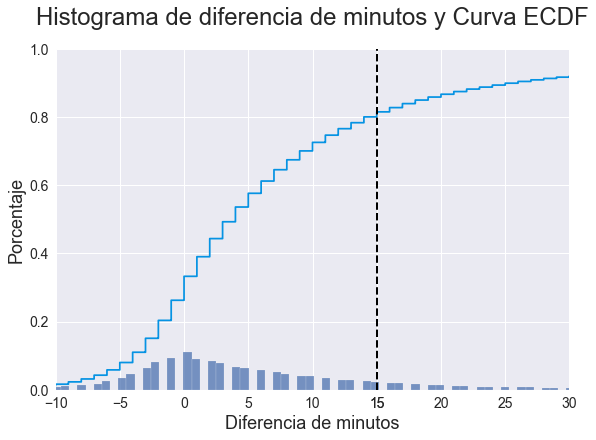

In [18]:
# min_dif histogram
fig, ax = plt.subplots(constrained_layout=True, figsize=(8,6))

sns.histplot(data=data_SCL, x="dif_min", stat="density", ax=ax)
sns.ecdfplot(data=data_SCL, x="dif_min", stat="proportion", color="#0693e3",
             ax=ax)
ax.set_xlim(-10, 30)
ax.set_xticks(list(plt.xticks()[0]) + [15])
ax.axvline(x=15, linestyle="--", linewidth="2", color="black")
ax.set_xlabel("Diferencia de minutos", size=18)
ax.set_ylabel("Porcentaje", size=18)
ax.tick_params(axis="both", which="major", labelsize=14)

plt.title("Histograma de diferencia de minutos y Curva ECDF", size=24, pad=24)
plt.savefig("graphs/HIST_dif_min03.png", bbox_inches="tight")

El histograma de diferencia de minutos y curva ECDF nos muestra que el 80% del total de vuelos tiene un atraso igual o menor a 15 minutos.

En el peor caso, de no contar con más herramientas para revisar el comportamiento de los vuelos , se podrían tomar los datos actuales y mediante distribución beta, inferir la cual sea el valor más probable de la probabilidad con que los vuelos se retrasan.

El siguiente paso es empezar a distinguir el atraso entre las distintas categorías de las que se dispone.

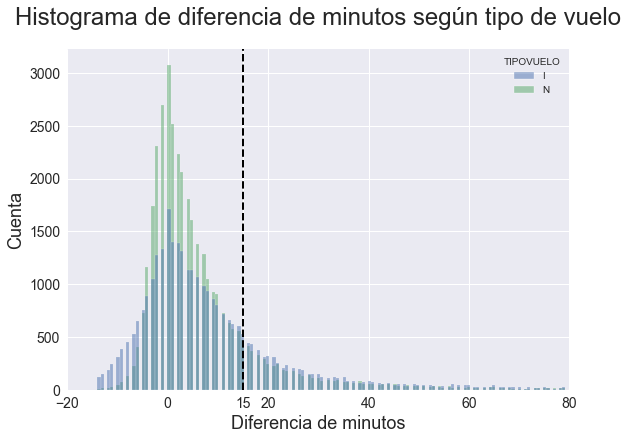

In [20]:
# min_dif histogram by TIPOVUELO
fig, ax = plt.subplots(constrained_layout=True, figsize=(8,6))

sns.histplot(data=data_SCL, x="dif_min", hue="TIPOVUELO", ax=ax)
ax.set_xlim(-20, 80)
ax.set_xticks(list(plt.xticks()[0]) + [15])
ax.axvline(x=15, linestyle="--", linewidth="2", color="black")
ax.set_xlabel("Diferencia de minutos", size=18)
ax.set_ylabel("Cuenta", size=18)
ax.tick_params(axis="both", which="major", labelsize=14)

plt.title("Histograma de diferencia de minutos según tipo de vuelo",
          size=24, pad=24)
plt.savefig("graphs/HIST_dif_min02.png", bbox_inches="tight")

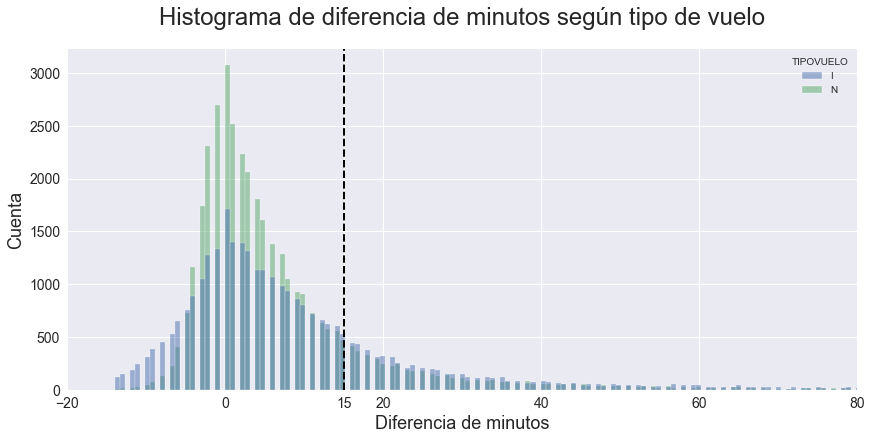

In [14]:
# min_dif histogram by TIPOVUELO
fig, ax = plt.subplots(constrained_layout=True, figsize=(12,6))

sns.histplot(data=data_SCL, x="dif_min", hue="TIPOVUELO", ax=ax)
ax.set_xlim(-20, 80)
ax.set_xticks(list(plt.xticks()[0]) + [15])
ax.axvline(x=15, linestyle="--", linewidth="2", color="black")
ax.set_xlabel("Diferencia de minutos", size=18)
ax.set_ylabel("Cuenta", size=18)
ax.tick_params(axis="both", which="major", labelsize=14)

plt.title("Histograma de diferencia de minutos según tipo de vuelo",
          size=24, pad=24)
plt.savefig("graphs/HIST_dif_min02.png", bbox_inches="tight")

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(12,12))

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# dif_min boxplot by TIPOVUELO
sns.boxplot(data=data_SCL, x="TIPOVUELO", y="dif_min", ax=ax1)
ax1.set_xlabel("Tipo de vuelo", size=18)
ax1.set_ylim(-20, 180)
ax1.set_ylabel("Vardif_min", size=18)
ax1.axhline(y=15, linestyle="--", linewidth="2", color="black")
ax1.tick_params(axis="both", which="major", labelsize=14)

# dif_min boxplot by temporada_alta,
sns.boxplot(data=data_SCL, x="temporada_alta", y="dif_min", ax=ax2)
ax2.set_xlabel("Temporada alta", size=18)
ax2.set_ylabel("Diferencia de minutos", size=18)
ax2.set_ylim(-20, 180)
ax2.axhline(y=15, linestyle="--", linewidth="2", color="black")
ax2.tick_params(axis="both", which="major", labelsize=14)

# dif_min boxplot by TIPOVUELO, hue by temporada_alta
sns.boxplot(data=data_SCL, x="TIPOVUELO", y="dif_min", hue="temporada_alta",
            ax=ax3)
ax3.set_xlabel("Tipo de vuelo", size=18)
ax3.set_ylabel("Diferencia de minutos", size=18)
ax3.set_ylim(-20, 180)
ax3.axhline(y=15, linestyle="--", linewidth="2", color="black")
ax3.tick_params(axis="both", which="major", labelsize=14)

fig.suptitle("Diferencia de minutos por tipo de vuelo y temporada alta",
             size=28)
plt.savefig("graphs/BXPLT_dif_min01.png", bbox_inches="tight")

In [ ]:

fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(12,12))

# dif_min boxplot by DIANOM,
sns.boxplot(data=data_SCL, x="DIANOM", y="dif_min", ax=axs[0])
axs[0].set_xlabel("DIANOM", size=16)
axs[0].set_ylabel("dif_min in minutes", size=16)
axs[0].set_ylim(-20, 180)
axs[0].axhline(y=15, linestyle="--", linewidth="2", color="black")

# dif_min boxplot by OPERA
sns.boxplot(data=data_SCL, x="OPERA", y="dif_min", ax=axs[1])
axs[1].set_xlabel("OPERA", size=16)
axs[1].set_ylabel("dif_min in minutes", size=16)
axs[1].set_ylim(-20, 180)
axs[1].axhline(y=15, linestyle="--", linewidth="2", color="black")
plt.xticks(rotation=90, size=14)

fig.suptitle("Diferencia en minutos por Día y Operador", size=24)
plt.savefig("graphs/BXPLT_dif_min02.png", bbox_inches="tight")

In [ ]:
# dif_min boxplot by DIANOM, hue by TIPOVUELO
sns.boxplot(data=data_SCL, x="DIANOM", y="dif_min", hue="TIPOVUELO")
plt.xlabel("DIANOM", size=16)
plt.xticks(rotation=90, size=14)
plt.ylabel("dif_min in minutes", size=16)
plt.ylim(-20, 180)

plt.title("dif_min boxplot by DIANOM and TIPOVUELO", size=24)
plt.savefig("graphs/BXPLT_dif_min03.png", bbox_inches="tight")

In [ ]:
# HEATMAP
c_tab = pd.crosstab([data_SCL.OPERA, data_SCL.TIPOVUELO],
                    [data_SCL.atraso_15, data_SCL.temporada_alta])

fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 6))

sns.heatmap(c_tab, annot=True, cbar=False, fmt="g", cmap="GnBu", ax=ax)
ax.set_xlabel("Atraso 15 y Temporada Alta", size=16)
ax.set_ylabel("Operador y Tipo de Vuelo", size=16)
ax.set_title("Mapa de calor de Atraso de quince minutos", size=24, pad=24)
ax.tick_params(axis="both", which="major", labelsize=14)

plt.savefig("graphs/CRSSTB01.png", bbox_inches="tight")